## Poetry Generation, Part 1: Hidden Markov Models
In this Jupyter notebook, we train an unsupervised HMM on the given Shakespearean sonnets and generate a 14-line sonnet. 

In [1]:
import os
import re
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

### Training Unsupervised HMM

#### Testing with different numbers of hidden states

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_cleaned.txt')).read()
obs, obs_map = parse_observations(text)

#### Sample Output

In [60]:
# Getting syllable dictionary
syllable_dict = {}
with open('data/Syllable_dictionary.txt') as f:
    for line in f.readlines():
        curr_line = line.split()
        
        syllable_dict[re.sub(r'[^\w]', '', curr_line[0]).lower()] = curr_line[-1]


In [61]:
def get_sample_sonnet(hmm, obs_map):
    # Total of 14 lines, 10 syllables each. There are 3 quatrains (4 lines) and 1 couplet (2 lines)
    sonnet = ""
    full = sample_sentence(hmm, obs_map, n_words=150).split()
    line_syllable = 0
    line_num = 0
    for word in full:
        if line_syllable == 0:
            word = word.capitalize()
        sonnet += word + " "
           
        line_syllable += int(syllable_dict[word.lower()])
    
        if line_syllable >= 10:
            # creating new line once we go over 10 syllables, but syllables do not carry over to next line
            line_syllable = 0
            line_num += 1
            sonnet += "\n"
            if line_num % 4 == 0:
                sonnet += "\n"
        if line_num == 14:
            # once we have over 14 lines we return our sonnet
            break
    return sonnet

In [43]:
# For testing
hmm1 = unsupervised_HMM(obs, 1, 10)

In [62]:
print(get_sample_sonnet(hmm1, obs_map))

Not is love to comes store hands i proud thou 
This as and i bravry who sets twixt love 
To with dyed dead upon all were and fast 
Enjoyer long subject cruel have for 

A loving wrinkles eternal yet nor 
Good after more know him of fresh harsh will 
Worst shall not white thou mock thy for was her 
Compounds can i forfeit thy into red 

Love find to and the number and be but 
So pays thee seen bad niggard state beautys 
Me precious i i my large the in reign 
Pray moan growth is and sound with doth so creature 

Even example case painted o these 
Thee the own fault desperate a know or had 



In [ ]:
hmm10 = unsupervised_HMM(obs, 10, 100)

In [63]:
print('Sample Sonnet (HMM10):\n====================')
print(get_sample_sonnet(hmm10, obs_map))

Sample Sonnet (HMM10):
No newfangled cold the love firstborn evil 
Moan up of their minutes not with my hearts 
To it after with make rude great thee best 
In of of eyes a you best great to me 

So hold shadows cure delights swear creatures 
Her banquet loved and and profaned it to 
Their cruel thou and treasure of skill thy 
Sweet your fair him thou end speaking guest nature 

You no knowledge upon my skill men sight 
Thine spirit the thou this an budding hasten 
Nothing to repair answers becomes were 
I thus sweet well that nor thou thee her entombed 

Is and merit the gives sunken will heart 
They what to to that can is thy best thy 



In [ ]:
hmm16 = unsupervised_HMM(obs, 16, 100)

In [64]:
print('Sample Sonnet (HMM16):\n====================')
print(get_sample_sonnet(hmm16, obs_map))

Sample Sonnet (HMM16):
Inward tombs and in but wardrobe changing 
Better seek my one alltyrant see joy 
Me come mine not nature more growth such earth 
What as never thou in in war i were 

None subscribes when still then that in that eyes 
Nor think hell tears honest offences my 
Angel a calls like the shall face my pure 
Th At thy bonds may neither if to that to 

My looks sweet shalt so to to weak world advantage 
All be scope hate every gentle heart of 
Poison them thy eye hold more bareness to 
Of first with oaths argument is never 

Is sin in my wide elements with wanting 
Thy basest me painting lies will state that 



### Visualization

#### Overall Wordcloud over All Sonnets

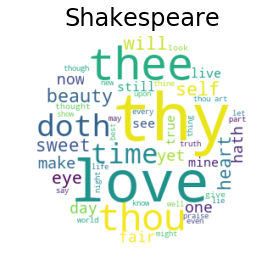

In [65]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

#### Wordclouds for Each Hidden State

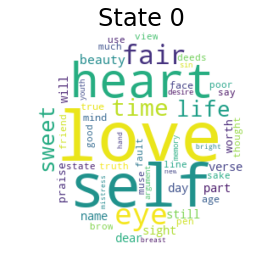

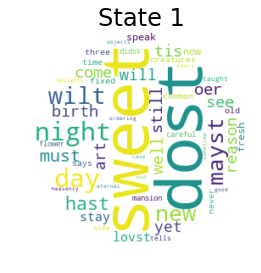

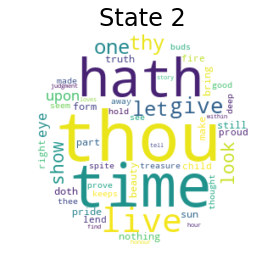

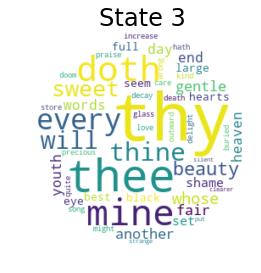

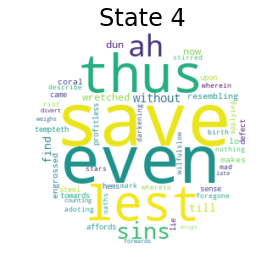

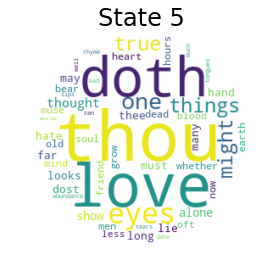

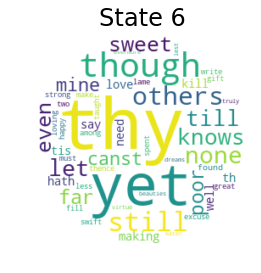

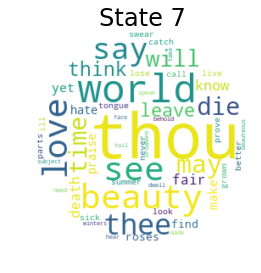

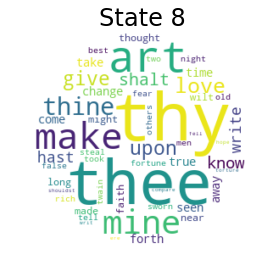

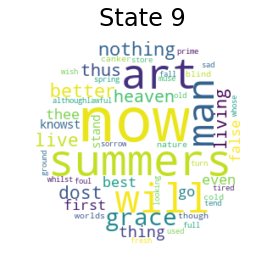

In [66]:
wordclouds = states_to_wordclouds(hmm10, obs_map)

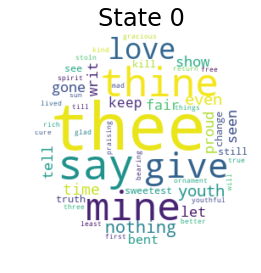

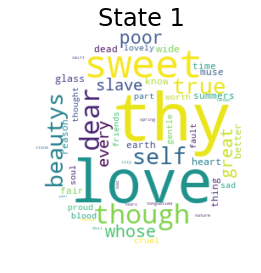

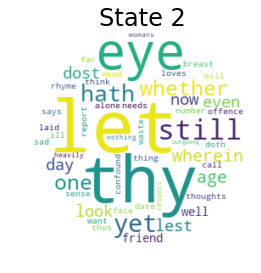

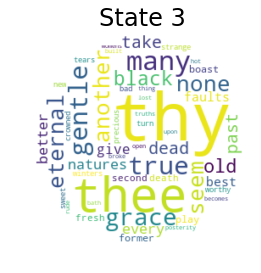

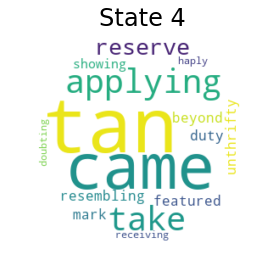

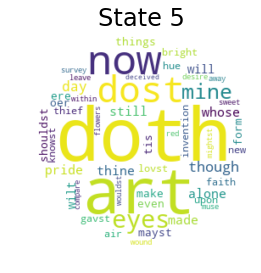

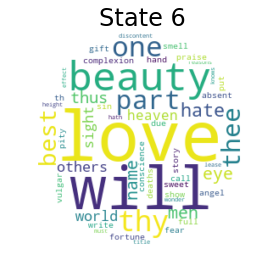

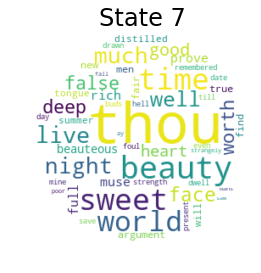

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [67]:
wordclouds = states_to_wordclouds(hmm16, obs_map)